In [37]:
import os
import pandas as pd
from yaml import safe_load

# Dossier contenant les runs MLflow (expérience 0)
mlruns_path = "mlruns/0"

# Liste pour stocker les données combinées
combined_data = []

# Parcours des sous-dossiers de runs
for run_id in os.listdir(mlruns_path):
    run_dir = os.path.join(mlruns_path, run_id)
    if not os.path.isdir(run_dir):
        continue

    # Dictionnaire pour stocker les données de ce run
    run_data = {"run_id": run_id}

    # Récupération des params
    params_path = os.path.join(run_dir, "params")
    if os.path.exists(params_path):
        for param_file in os.listdir(params_path):
            with open(os.path.join(params_path, param_file), "r") as f:
                value = f.read().strip()
                run_data[param_file] = value  # clé = nom du paramètre

    # Récupération des metrics (dernière valeur de chaque métrique)
    metrics_path = os.path.join(run_dir, "metrics")
    if os.path.exists(metrics_path):
        for metric_file in os.listdir(metrics_path):
            with open(os.path.join(metrics_path, metric_file), "r") as f:
                lines = [line.strip() for line in f if line.strip()]
                if lines:
                    # Format: step timestamp value (on prend la dernière ligne)
                    last_value = float(lines[-1].split(" ")[1])
                    run_data[metric_file] = last_value  # clé = nom de la métrique

    combined_data.append(run_data)

# Création du DataFrame combiné
combined_df = pd.DataFrame(combined_data)


combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,17ba8fb03b5646118b5c46c5529caad7,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,8,...,0.007895,0.765263,0.033158,70.157895,5.034001,76.526316,-3.210526,0.042105,96.997680,92.30
1,f42530f13b5b41868f799b6ac95d938e,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,6,...,0.007368,0.764737,0.066316,69.578947,5.020810,76.473684,-3.263158,0.090000,96.628770,91.76
2,f9d3db15ea6f438bb360764a74d4e87c,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,7,...,0.010526,0.746316,0.030526,68.947368,4.949645,74.631579,-5.105263,0.043158,96.709977,92.06
3,c424db3ab4f4480b8797dd126ea69e63,0.95,SRGradMask,3,0.0001,0,0.5,1900,cifar10,1,...,0.015263,0.952632,0.638421,78.421053,6.135418,95.263158,15.526316,0.685789,98.668213,93.86
4,bf7fb3fdcdcc4969948cacb81e7bcb0c,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,10,...,0.004211,0.783684,0.035789,70.105263,5.023931,78.368421,-1.368421,0.050000,97.222738,92.94
5,632c0df908cf4c7da65b1e0fa9ef599d,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,4,...,0.013158,0.778947,0.143158,70.000000,4.974213,77.894737,-1.842105,0.184211,96.703016,91.86
6,dc2e65eebba34215b2de39cb91cc64c2,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,1,...,0.018947,0.924211,0.587368,77.315789,6.095644,92.421052,12.684211,0.624211,98.438515,93.30
7,d3f73b2a26a04132b54346a38e19f526,0.95,SRL,3,0.0001,0,0.5,1900,cifar10,7,...,0.014737,0.724211,0.041579,67.947368,6.739026,72.421053,-7.315789,0.063158,96.607889,91.90
8,f915c0e4bf1e4325876bfc237cd93543,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,9,...,0.005263,0.792632,0.050526,70.631579,4.934079,79.263158,-0.473684,0.063684,97.259861,92.66
9,d886956cb57b4d28a7d859273a7512c3,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,3,...,0.024737,0.777368,0.226316,69.789474,5.059951,77.736842,-2.000000,0.267368,96.484919,91.20


In [38]:
os.listdir(mlruns_path)

['17ba8fb03b5646118b5c46c5529caad7',
 'f42530f13b5b41868f799b6ac95d938e',
 'f9d3db15ea6f438bb360764a74d4e87c',
 'c424db3ab4f4480b8797dd126ea69e63',
 'bf7fb3fdcdcc4969948cacb81e7bcb0c',
 '632c0df908cf4c7da65b1e0fa9ef599d',
 'dc2e65eebba34215b2de39cb91cc64c2',
 'd3f73b2a26a04132b54346a38e19f526',
 'f915c0e4bf1e4325876bfc237cd93543',
 'd886956cb57b4d28a7d859273a7512c3',
 'b87ac0c26b094c79809e576e80c63067',
 'eab603f176c24bb59a33cb9cc2bf6638',
 '5e60e5ec97954122ab22bd93f1f7cc6e',
 'c85f19fcaab14376bff3b252d6f6319d',
 '71167250fac94d60bc34c9320ec5b44b',
 '4b7b9e85be2741f8a44e49d73ab80c38',
 '52f9ea6aac6a436eb3b84416a3136291',
 'b6dc1b0fd8c04925800078fffca8e699',
 '448a62741c0b4caa9e3d2295573216a6',
 '3b3c588a6e5b4c558632cd5e738f7a2d',
 'e1c6402909b346fabb0f556f6366491f',
 'meta.yaml',
 'e957feaccc044b99bdc419764e01fa3f',
 '75cb7b1b392e4aeeb088709694933ee8',
 'c33c304340134428b914053534739dc5',
 '25872e76f7ce436eb3e3042fa5772dbe',
 '6a99c10c981e480f898206ae33a5653a']

In [39]:
combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,17ba8fb03b5646118b5c46c5529caad7,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,8,...,0.007895,0.765263,0.033158,70.157895,5.034001,76.526316,-3.210526,0.042105,96.997680,92.30
1,f42530f13b5b41868f799b6ac95d938e,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,6,...,0.007368,0.764737,0.066316,69.578947,5.020810,76.473684,-3.263158,0.090000,96.628770,91.76
2,f9d3db15ea6f438bb360764a74d4e87c,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,7,...,0.010526,0.746316,0.030526,68.947368,4.949645,74.631579,-5.105263,0.043158,96.709977,92.06
3,c424db3ab4f4480b8797dd126ea69e63,0.95,SRGradMask,3,0.0001,0,0.5,1900,cifar10,1,...,0.015263,0.952632,0.638421,78.421053,6.135418,95.263158,15.526316,0.685789,98.668213,93.86
4,bf7fb3fdcdcc4969948cacb81e7bcb0c,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,10,...,0.004211,0.783684,0.035789,70.105263,5.023931,78.368421,-1.368421,0.050000,97.222738,92.94
5,632c0df908cf4c7da65b1e0fa9ef599d,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,4,...,0.013158,0.778947,0.143158,70.000000,4.974213,77.894737,-1.842105,0.184211,96.703016,91.86
6,dc2e65eebba34215b2de39cb91cc64c2,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,1,...,0.018947,0.924211,0.587368,77.315789,6.095644,92.421052,12.684211,0.624211,98.438515,93.30
7,d3f73b2a26a04132b54346a38e19f526,0.95,SRL,3,0.0001,0,0.5,1900,cifar10,7,...,0.014737,0.724211,0.041579,67.947368,6.739026,72.421053,-7.315789,0.063158,96.607889,91.90
8,f915c0e4bf1e4325876bfc237cd93543,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,9,...,0.005263,0.792632,0.050526,70.631579,4.934079,79.263158,-0.473684,0.063684,97.259861,92.66
9,d886956cb57b4d28a7d859273a7512c3,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,3,...,0.024737,0.777368,0.226316,69.789474,5.059951,77.736842,-2.000000,0.267368,96.484919,91.20


26


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_5252/2599978803.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


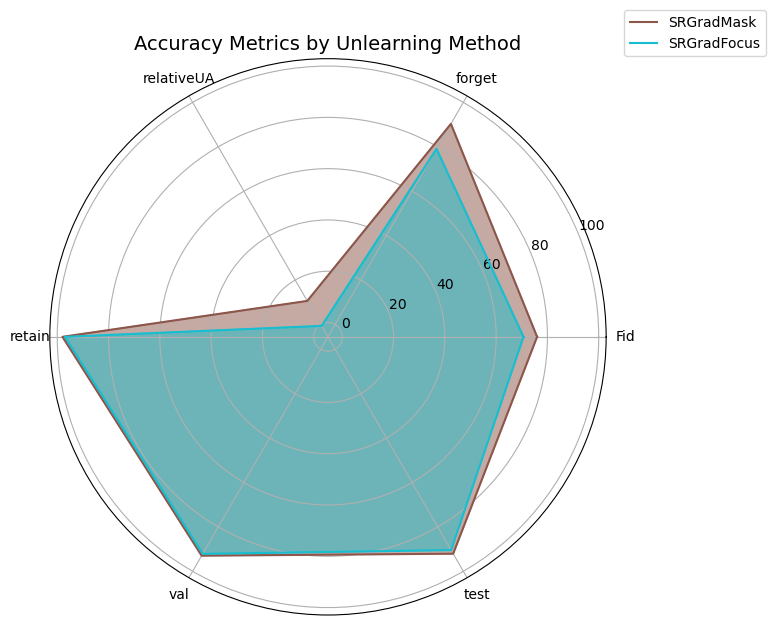

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = combined_df.copy()
df = df[(df["num_indexes_to_replace"] == "1900")]
# df['relativeUA'] = 100 - df['relativeUA'].astype(float)
print(len(df))

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ['Fid','forget',
       'relativeUA', 'retain', 'val', 'test']
methods = df["unlearn"].unique()
methods = ["SalUn", "SRGradMask", "SRGradFocus"]

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = df.groupby("unlearn")[accuracy_cols].mean()

# --- Étape 3 : construction du radar plot ---
# Préparation des angles
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# Style
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Couleurs pour les différentes méthodes
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    try:
        values = method_means.loc[method].tolist()
        values += values[:1]  # boucle fermée
        plt.plot(angles, values, label=method, color=colors(idx))
        plt.fill(angles, values, alpha=0.5, color=colors(idx))
    except KeyError:
        print(f"Warning: Method '{method}' not found in the DataFrame.")

# Labels axes
plt.xticks(angles[:-1], labels)
plt.title("Accuracy Metrics by Unlearning Method", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [41]:
df[df["unlearn"] == "EspGrad"]

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val


In [42]:
df.columns

Index(['run_id', 'beta', 'unlearn', 'seed', 'unlearn_lr', 'class_to_replace',
       'quantile', 'num_indexes_to_replace', 'dataset', 'unlearn_epochs',
       'arch', 'model', 'save_dir', 'MIA_confidence', 'test', 'MIA_prob',
       'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
       'relativeUA', 'MIA_entropy', 'retain', 'val'],
      dtype='object')

In [43]:
df["unlearn_epochs"] = df["unlearn_epochs"].astype(int)
df.sort_values(by="unlearn_epochs", inplace=True)

# Index(['run_id', 'beta', 'unlearn_method', 'unlearn', 'unlearn_lr', 'quantile',
#    'num_indexes_to_replace', 'unlearn_epochs', 'model', 'save_dir', 'seed',
#    'class_to_replace', 'dataset', 'arch', 'MIA_confidence', 'test',
#    'MIA_prob', 'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
#    'relativeUA', 'MIA_entropy', 'retain', 'val'],
#   dtype='object')

# convert all metrics to float
for col in df.columns:
    if col not in ["run_id", "unlearn", "unlearn_method", "model", "save_dir", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs", "dataset", "arch"]:
        print(col)
        df[col] = df[col].astype(float)
# mean with respect to seed
df_mean = df.groupby(["run_id", "unlearn", "model", "save_dir", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs", "dataset", "arch"]).mean().reset_index()
df_mean

beta
seed
unlearn_lr
quantile
MIA_confidence
test
MIA_prob
MIA_correctness
MIA_m_entropy
Fid
RTE
forget
relativeUA
MIA_entropy
retain
val


,run_id,unlearn,model,save_dir,num_indexes_to_replace,class_to_replace,unlearn_epochs,dataset,arch,beta,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,17ba8fb03b5646118b5c46c5529caad7,SRGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,8,cifar10,resnet18,0.95,...,0.007895,0.765263,0.033158,70.157895,5.034001,76.526316,-3.210526,0.042105,96.997680,92.30
1,25872e76f7ce436eb3e3042fa5772dbe,SRL,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,4,cifar10,resnet18,0.95,...,0.021053,0.745789,0.162632,68.421053,4.166292,74.578947,-5.157895,0.201053,96.610209,91.54
2,3b3c588a6e5b4c558632cd5e738f7a2d,NGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,1,cifar10,resnet18,0.95,...,0.150000,0.683158,0.408421,64.052632,7.335321,68.315789,-11.421053,0.434737,95.624130,90.18
3,448a62741c0b4caa9e3d2295573216a6,SRL,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,8,cifar10,resnet18,0.95,...,0.013158,0.735789,0.045789,68.631579,4.183950,73.578947,-6.157895,0.067368,96.865429,92.14
4,4b7b9e85be2741f8a44e49d73ab80c38,SRL,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,9,cifar10,resnet18,0.95,...,0.009474,0.771579,0.073158,70.105263,6.973970,77.157894,-2.578947,0.105789,97.160093,92.60
5,52f9ea6aac6a436eb3b84416a3136291,SRL,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,5,cifar10,resnet18,0.95,...,0.014737,0.745263,0.132632,68.105263,6.655125,74.526316,-5.210526,0.167368,96.723898,91.74
6,5e60e5ec97954122ab22bd93f1f7cc6e,NGPlus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,1,cifar10,resnet18,0.95,...,0.134737,0.713158,0.426316,66.210526,4.911394,71.315789,-8.421053,0.443158,95.921114,90.58
7,632c0df908cf4c7da65b1e0fa9ef599d,SRGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,4,cifar10,resnet18,0.95,...,0.013158,0.778947,0.143158,70.000000,4.974213,77.894737,-1.842105,0.184211,96.703016,91.86
8,6a99c10c981e480f898206ae33a5653a,SRGradMask,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,2,cifar10,resnet18,0.95,...,0.027895,0.853684,0.281053,73.526316,5.144786,85.368421,5.631579,0.326842,97.266821,92.08
9,71167250fac94d60bc34c9320ec5b44b,SRL,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,2,cifar10,resnet18,0.95,...,0.047368,0.782105,0.224737,69.684211,4.155829,78.210526,-1.526316,0.271579,96.791183,91.36


In [44]:
group_cols = ["unlearn", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs"]

# Vérifie qu'elles existent
group_cols = [col for col in group_cols if col in df.columns]

# Colonnes numériques sans celles du groupby
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in group_cols]

# Debugging
print("Group columns:", group_cols)
print("Numeric columns:", numeric_cols)
print("DataFrame shape:", df.shape)

df_mean = df[group_cols + numeric_cols].groupby(group_cols).mean().reset_index()

df_std = df[group_cols + numeric_cols].groupby(group_cols).std().reset_index()
df_mean = df_mean.merge(df_std, on=group_cols, suffixes=('', '_std'))

df_mean.sort_values(by="unlearn_epochs", inplace=True)
df_mean

Group columns: ['unlearn', 'num_indexes_to_replace', 'class_to_replace', 'unlearn_epochs']
Numeric columns: ['beta', 'seed', 'unlearn_lr', 'quantile', 'MIA_confidence', 'test', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget', 'relativeUA', 'MIA_entropy', 'retain', 'val']
DataFrame shape: (26, 25)


,unlearn,num_indexes_to_replace,class_to_replace,unlearn_epochs,beta,seed,unlearn_lr,quantile,MIA_confidence,test,...,MIA_prob_std,MIA_correctness_std,MIA_m_entropy_std,Fid_std,RTE_std,forget_std,relativeUA_std,MIA_entropy_std,retain_std,val_std
0,NGPlus,1900,0,1,0.95,3.0,0.0001,0.5,0.538421,89.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NGradFocus,1900,0,1,0.95,3.0,0.0001,0.5,0.511053,89.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NGradMask,1900,0,1,0.95,3.0,0.0001,0.5,0.504737,89.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SRGradFocus,1900,0,1,0.95,3.0,0.0001,0.5,0.782632,92.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,SRL,1900,0,1,0.95,3.0,0.0001,0.5,0.765263,92.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,SRGradMask,1900,0,1,0.95,3.0,0.0001,0.5,0.828947,92.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NGPlus,1900,0,2,0.95,3.0,0.0001,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SRGradFocus,1900,0,2,0.95,3.0,0.0001,0.5,0.533684,90.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,SRL,1900,0,2,0.95,3.0,0.0001,0.5,0.504737,90.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,SRGradMask,1900,0,2,0.95,3.0,0.0001,0.5,0.591579,91.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_mean[df_mean["unlearn_epochs"] == 10][['unlearn','RTE','Fid', 'forget', 'relativeUA', 'retain', 'val', 'test','MIA_confidence', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy']]

,unlearn,RTE,Fid,forget,relativeUA,retain,val,test,MIA_confidence,MIA_prob,MIA_correctness,MIA_m_entropy
13,SRGradFocus,5.023931,70.105263,78.368421,-1.368421,97.222738,92.94,90.46,0.178421,0.004211,0.783684,0.035789
25,SRL,6.955910,70.157895,78.000000,-1.736842,97.248260,93.00,90.48,0.243684,0.008947,0.780000,0.070000


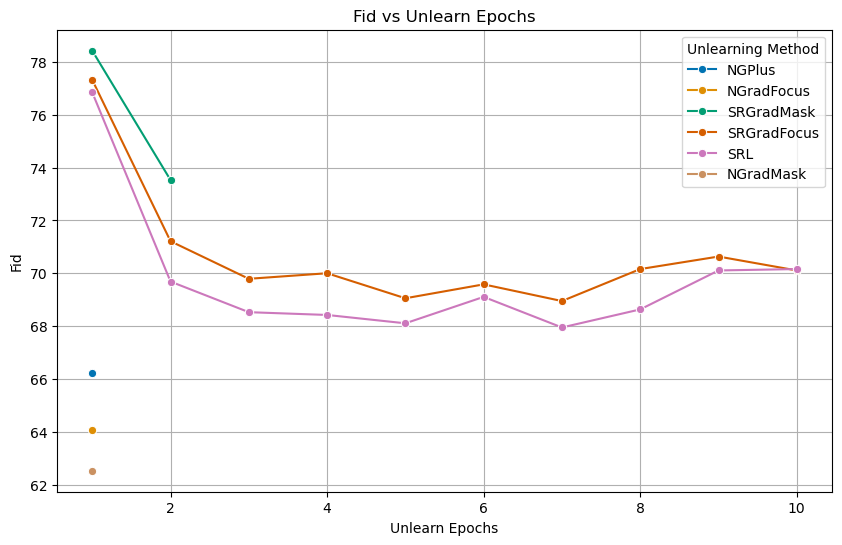

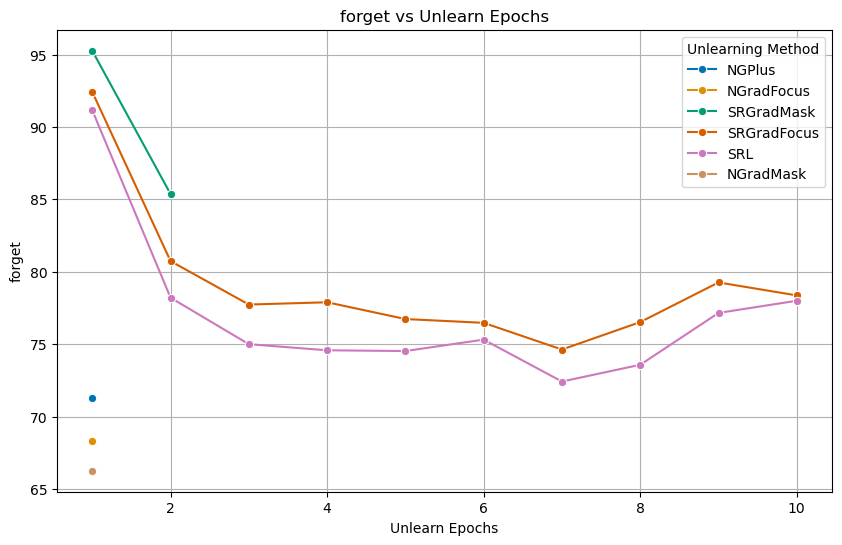

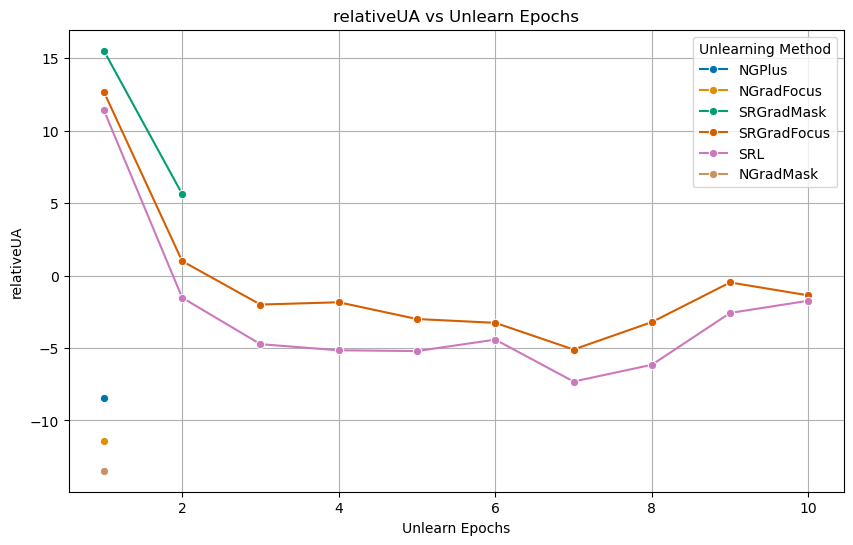

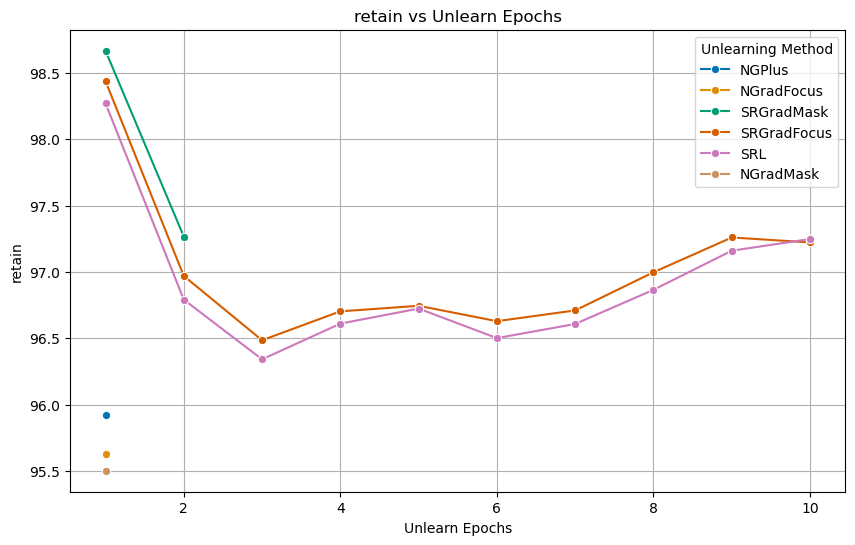

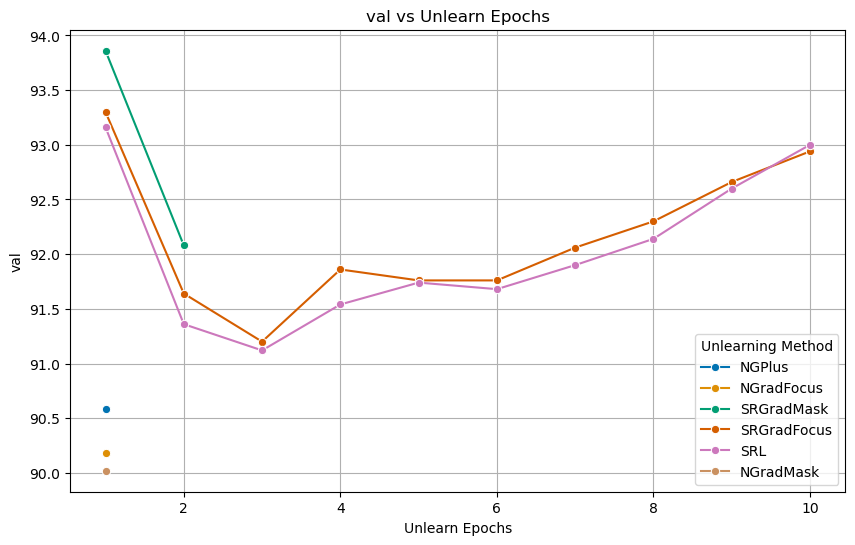

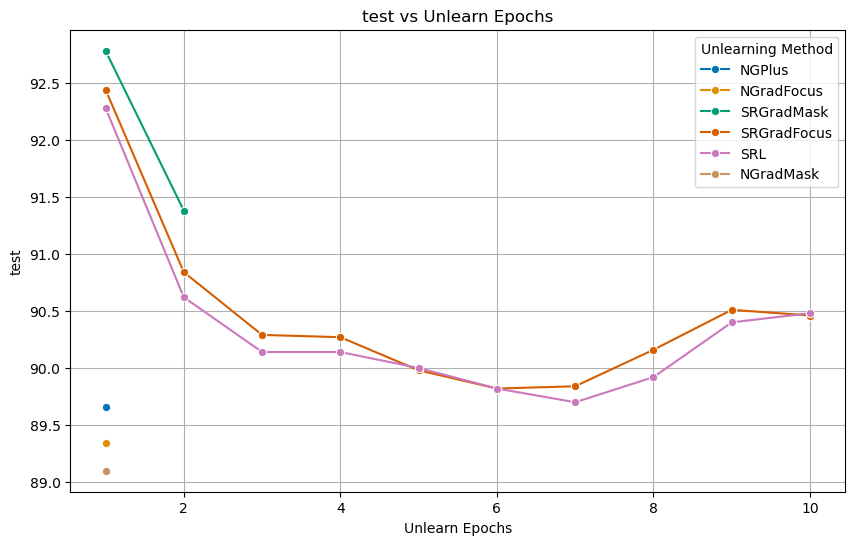

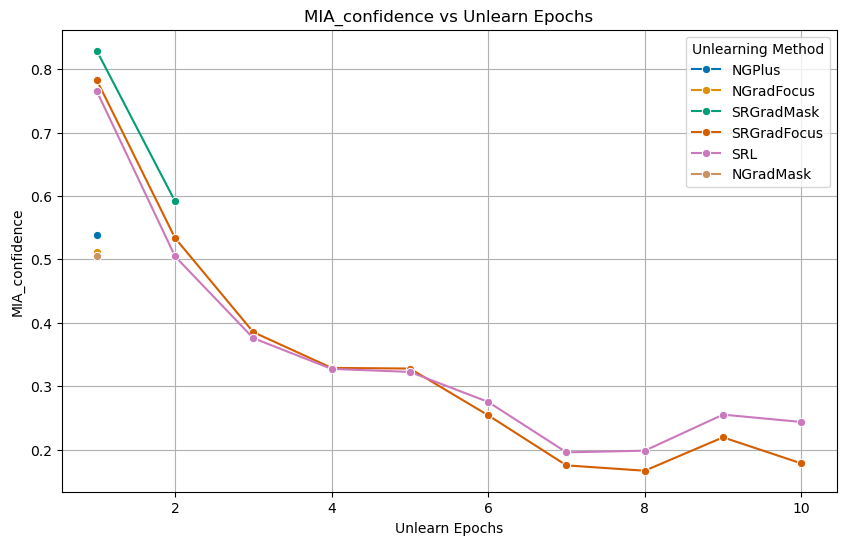

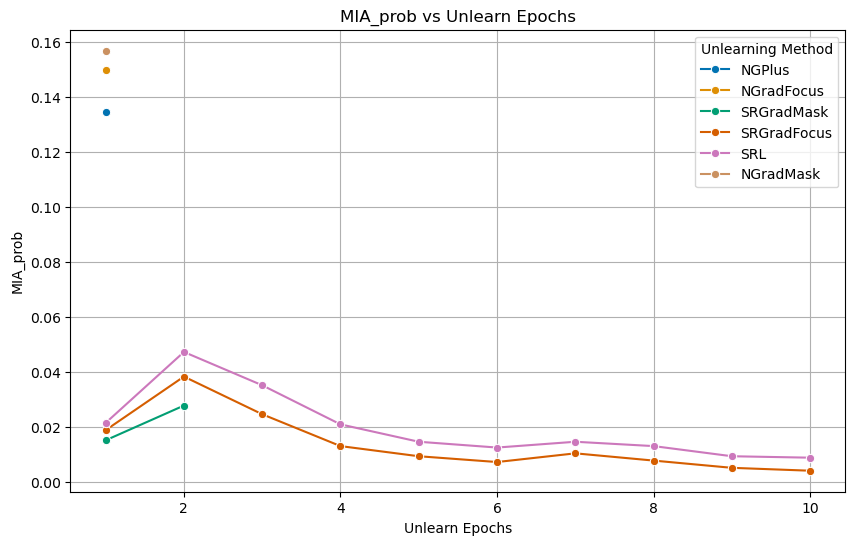

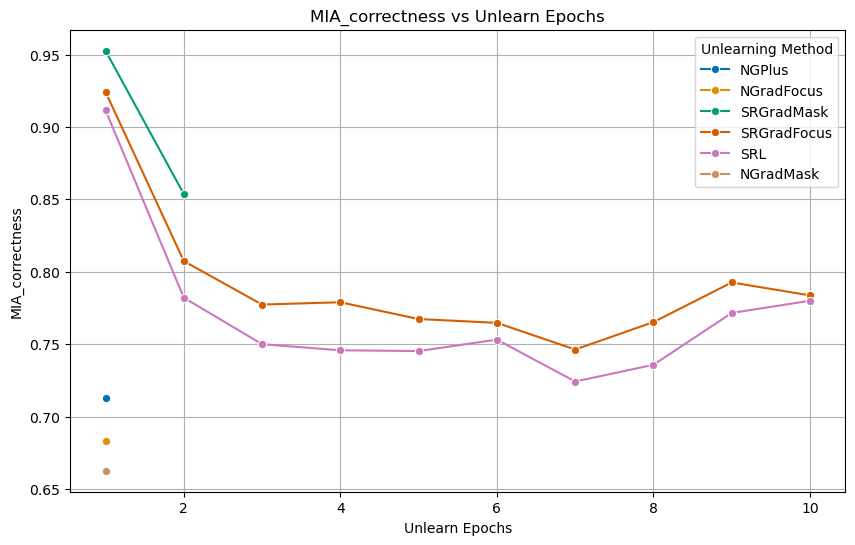

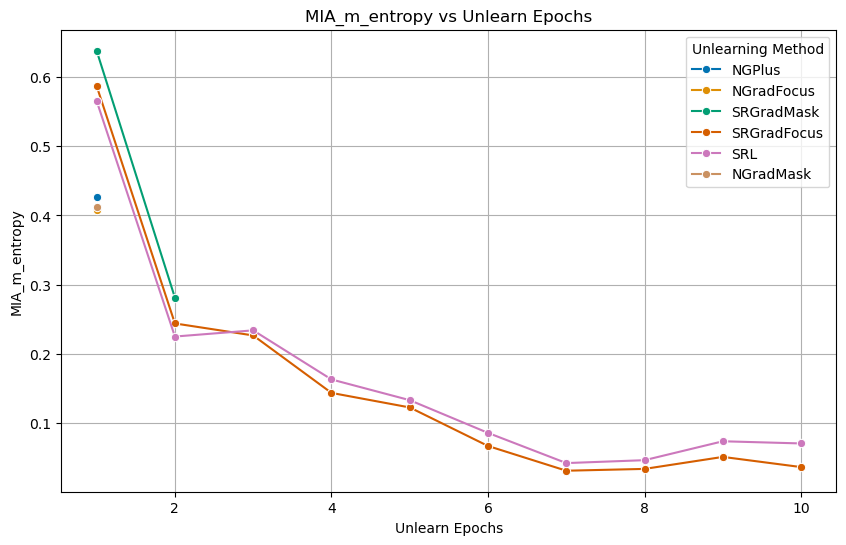

In [46]:
# plot metrics en fonction du nombre de unlearn_epochs
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("colorblind")
df["unlearn_epochs"] = df["unlearn_epochs"].astype(int)
df.sort_values(by="unlearn_epochs", inplace=True)
for metric in ['Fid', 'forget', 'relativeUA', 'retain', 'val', 'test','MIA_confidence', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy']:
    plt.figure(figsize=(10, 6))
    # sns.lineplot(data=df[df['unlearn'].isin(["SalUn", "SRL", "EspGrad", "VarGrad"])], x='unlearn_epochs', y=metric, hue='unlearn', marker='o', sort=True)
    sns.lineplot(data=df, x='unlearn_epochs', y=metric, hue='unlearn', marker='o', sort=True)
    
    plt.title(f'{metric} vs Unlearn Epochs')
    plt.xlabel('Unlearn Epochs')
    plt.ylabel(metric)
    plt.legend(title='Unlearning Method')
    plt.grid(True)
    plt.show()

In [47]:
# import torch
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib as mpl

# # Configuration matplotlib pour rendu publication
# mpl.rcParams.update({
#     'font.family': 'serif',
#     'font.size': 12,
#     'axes.titlesize': 16,
#     'axes.labelsize': 14,
#     'legend.fontsize': 12,
#     'xtick.labelsize': 12,
#     'ytick.labelsize': 12,
#     'text.usetex': False,  # Peut être mis à True si tu compiles en LaTeX
# })

# # Couleurs sobres pour publication
# main_color = "#1f77b4"       # bleu scientifique
# hist_color = "#aec7e8"        # bleu clair

# # Chargement des tensors VMask
# VMask = {}
# for epoch in range(5):
#     VMask[epoch] = {}
#     for idx in range(5):
#         vmask_path = f"./results/cifar10/vmask/vmask_{idx}_{epoch}.pt"
#         if os.path.exists(vmask_path):
#             vmask = torch.load(vmask_path)
#             print(f"Loaded vmask from {vmask_path} with shape {vmask.shape}")
#             VMask[epoch][idx] = vmask

# # Affichage de la distribution avec histogramme + KDE
# for epoch, masks in VMask.items():
#     all_masks = torch.cat([mask.flatten() for mask in masks.values()])
#     values = all_masks.cpu().numpy()
#     mean_val = values.mean()
#     std_val = values.std()
#     count = len(values)

#     print(f"Epoch {epoch}: Mean={mean_val:.4f}, Std={std_val:.4f}, Count={count}")

#     plt.figure(figsize=(10, 6))

#     # Histogramme
#     sns.histplot(
#         values,
#         bins=80,
#         stat="density",
#         color=hist_color,
#         edgecolor="black",
#         alpha=0.5,
#         label="Histogram"
#     )

#     # KDE
#     sns.kdeplot(
#         values,
#         color=main_color,
#         linewidth=2.5,
#         bw_adjust=0.5,
#         label="Density (KDE)"
#     )

#     # Titres et légendes
#     plt.title("Distribution of the Probability", pad=10)
#     plt.suptitle(f"Mean = {mean_val:.4f} | Std = {std_val:.4f} | N = {count}", fontsize=10, y=0.95, color='gray')

#     plt.xlabel("Values of $\mathbb{P}[XY > 0| \hat X,\hat Y]$")
#     plt.ylabel("Density")
#     plt.grid(True, linestyle='--', alpha=0.4)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


In [48]:
x,y = 0, 0
a ,b = x,y
a = a +1
a,x

(1, 0)